In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
from google.colab import files 
uploaded= files.upload () 

Saving heart_failure_clinical_records_dataset.csv to heart_failure_clinical_records_dataset.csv


In [3]:
data=pd.read_csv("heart_failure_clinical_records_dataset.csv")
data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [4]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [5]:
# Outlier detection 
from collections import Counter
def detect_outliers(df,n,features):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than n outliers according
    to the Tukey method.
    """
    outlier_indices = []
    
    # iterate over features(columns)
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outliers

In [6]:
# detect outliers from Age, SibSp , Parch and Fare
Outliers_to_drop = detect_outliers(data.select_dtypes(include=np.number),2,data.select_dtypes(include=np.number).columns[:-1])

In [7]:
data.loc[Outliers_to_drop] # Show the outliers rows

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT


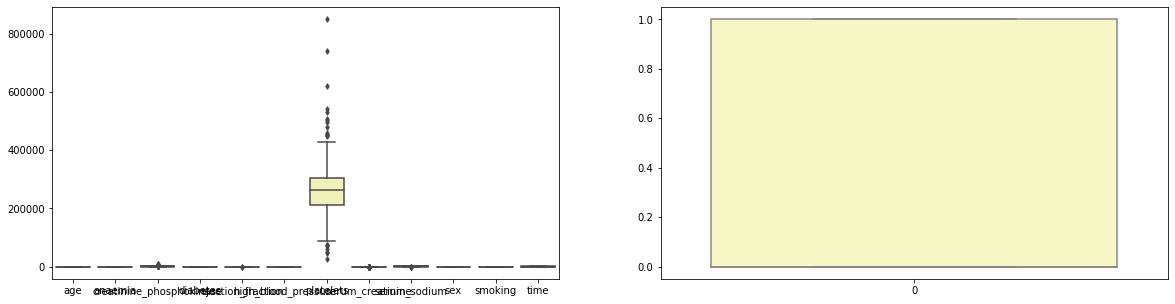

In [9]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sb.boxplot(data=data[data.columns[:-1]],fliersize=4,palette="Spectral")
plt.subplot(122)
sb.boxplot(data=data["DEATH_EVENT"],fliersize=4,palette="Spectral")

plt.show()

In [10]:
# Drop outliers
data = data.drop(Outliers_to_drop, axis = 0).reset_index(drop=True)
data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [11]:
# Fill empty and NaNs values with NaN
data=data.fillna(np.nan)
# Check for Null values
data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

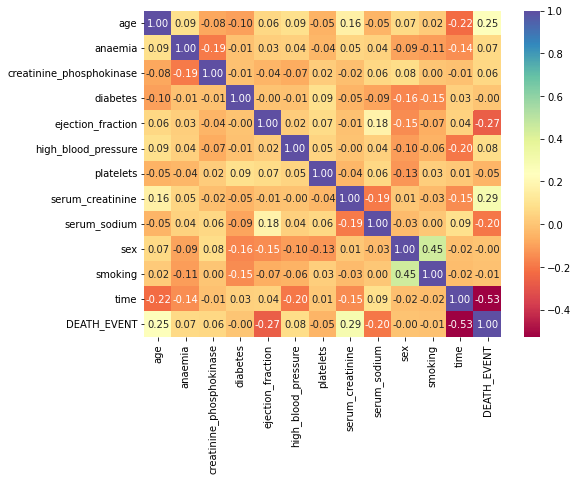

In [12]:
plt.figure(figsize=(8,6))
g = sb.heatmap(data.corr(),annot=True, fmt = ".2f", cmap = "Spectral")
plt.show()

<Figure size 360x216 with 0 Axes>

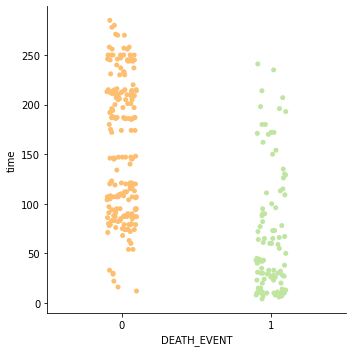

In [14]:
plt.figure(figsize=(5,3))
g = sb.catplot(x="DEATH_EVENT",y="time",data=data.round(1),kind="strip",height=5,aspect=1,palette="Spectral")
plt.show()

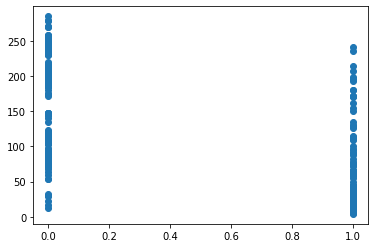

In [17]:
plt.scatter(data["DEATH_EVENT"],data["time"])
plt.show()

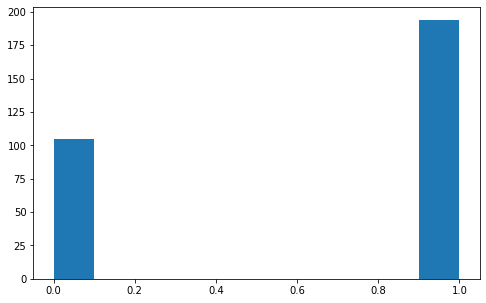

In [19]:
plt.figure(figsize=(8,5))
plt.hist(data["sex"])
plt.show()

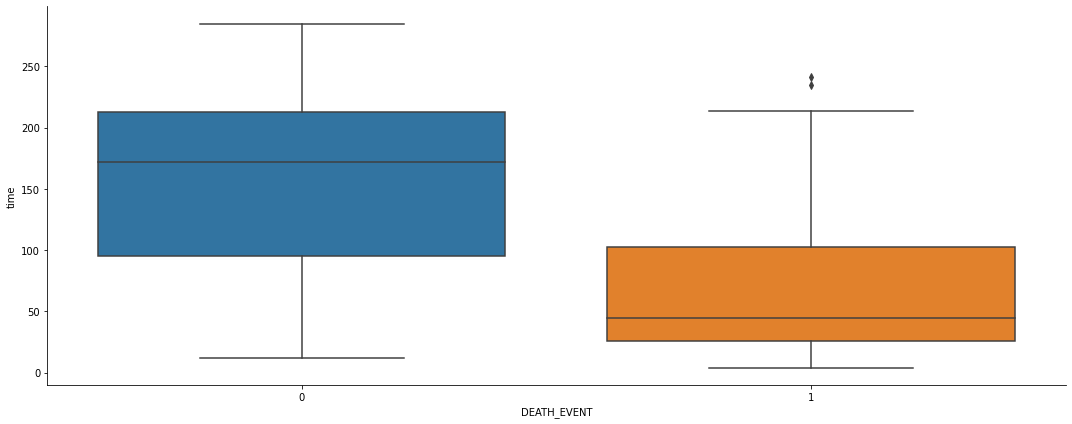

In [22]:
g=sb.catplot(x="DEATH_EVENT",y="time",data=data,kind="box",height=6,aspect=2.5)

In [23]:
from sklearn.model_selection import train_test_split

In [25]:
X=data.drop(columns="DEATH_EVENT")
y=data["DEATH_EVENT"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1432)

In [26]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, BaggingClassifier, HistGradientBoostingClassifier 
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, ExtraTreesRegressor, BaggingRegressor, HistGradientBoostingRegressor 
from sklearn.ensemble import VotingClassifier, StackingClassifier, StackingRegressor, VotingRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, cross_validate
from sklearn.metrics import classification_report, accuracy_score, mean_squared_error
import sklearn
# Cross validate model with Kfold stratified cross val
kfold = StratifiedKFold(n_splits=5)

In [27]:
print(sorted(sklearn.metrics.SCORERS.keys()))

['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'balanced_accuracy', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted', 'max_error', 'mutual_info_score', 'neg_brier_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_gamma_deviance', 'neg_mean_poisson_deviance', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'neg_root_mean_squared_error', 'normalized_mutual_info_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'rand_score', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'roc_auc_ovo', 'roc_auc_ovo_weighted', 'roc_auc_ovr', 'roc_auc_ovr_weighted', 'top_k_accuracy', 'v_measure_score']


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


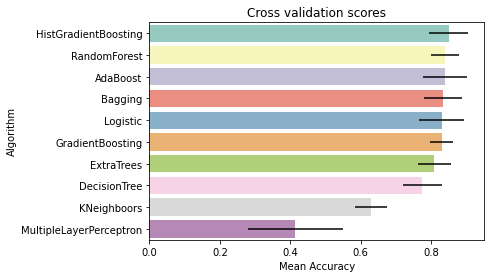

In [28]:
# Modeling step Test differents algorithms 
random_state = None
classifiers = []
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(random_state=random_state,learning_rate=0.1))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(BaggingClassifier(random_state=random_state))
classifiers.append(HistGradientBoostingClassifier(random_state=random_state))
classifiers.append(LogisticRegression(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))

cv_results, cv_results2 = [], []
for classifier in classifiers:
    cv_results.append(cross_val_score(classifier,X_train,y=y_train,scoring="accuracy",cv=kfold,n_jobs=4))
    classifier.fit(X_train,y_train)
    y_pred=classifier.predict(X_test)
    cv_results2.append(accuracy_score(y_pred,y_test))

cv_means = []
cv_std = []
cv_acc = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors":cv_std,"Accuracy":cv_results2,
                       "Algorithm":["RandomForest","AdaBoost","GradientBoosting","ExtraTrees","Bagging","HistGradientBoosting",
                                    "Logistic","KNeighboors","DecisionTree","MultipleLayerPerceptron"]})
cv_res=cv_res.sort_values(by="CrossValMeans",ascending=False)
g = sb.barplot("CrossValMeans","Algorithm",data=cv_res,palette="Set3",orient="h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

In [29]:

cv_res

,CrossValMeans,CrossValerrors,Accuracy,Algorithm
5,0.850,0.031623,0.808081,HistGradientBoosting
0,0.840,0.056125,0.858586,RandomForest
1,0.840,0.040620,0.848485,AdaBoost
4,0.835,0.064420,0.797980,Bagging
6,0.830,0.045826,0.838384,Logistic
2,0.830,0.062048,0.838384,GradientBoosting
3,0.810,0.053852,0.797980,ExtraTrees
8,0.775,0.044721,0.777778,DecisionTree
7,0.630,0.055678,0.606061,KNeighboors
9,0.415,0.135647,0.686869,MultipleLayerPerceptron


# Problema de clasificación

In [31]:
RFC = RandomForestClassifier()
RFC.fit(X_train,y_train)

HGC = HistGradientBoostingClassifier()
HGC.fit(X_train,y_train)

ADC = AdaBoostClassifier()
ADC.fit(X_train,y_train)

BAC = BaggingClassifier()
BAC.fit(X_train,y_train)



pred_RFC=RFC.predict(X_test)
pred_HGC=HGC.predict(X_test)
pred_ADC=ADC.predict(X_test)
pred_BAC=BAC.predict(X_test)

In [32]:
for i,j in zip([pred_RFC,pred_HGC,pred_ADC,pred_BAC],["RFC","HGC","ADC","BAC"]):
    print("RMSE for ",j,"is ",np.sqrt(mean_squared_error(i,y_test)))

RMSE for  RFC is  0.37605071654517747
RMSE for  HGC is  0.4380858271151806
RMSE for  ADC is  0.41438770700537403
RMSE for  BAC is  0.4494665749754947


In [41]:
#voting : {'hard', 'soft'}
votingC = VotingClassifier(estimators=[('RFC', RFC),('HGC', HGC),('ADC',ADC),('BAC',BAC)], voting='soft', n_jobs=4)
votingC = votingC.fit(X_train, y_train)
DEATH_EVENT_predicted_All_Voting = votingC.predict(X_test)

In [42]:
print("RMSE for Voting is ",np.sqrt(mean_squared_error(DEATH_EVENT_predicted_All_Voting,y_test)))

RMSE for Voting is  0.41438770700537403


In [43]:

#stack_method : {'auto', 'predict_proba', 'decision_function', 'predict'}
stackingC = StackingClassifier(estimators=[('RFC', RFC),('HGC', HGC),('ADC',ADC),('BAC',BAC)], stack_method='auto', n_jobs=4)
stackingC = stackingC.fit(X_train, y_train)
DEATH_EVENT_predicted_All_Stacking = stackingC.predict(X_test)

In [44]:

print("RMSE for Stacking is ",np.sqrt(mean_squared_error(DEATH_EVENT_predicted_All_Stacking,y_test)))

RMSE for Stacking is  0.40201512610368484


In [45]:
def rmse(dat):
    return np.sqrt(mean_squared_error(dat,y_test))
resultados=pd.DataFrame()
resultados["Modelo"]=["RFC","HGC","ADC","BAC","Voting","Stacking"]
resultados["RMSE"]=[rmse(pred_RFC),rmse(pred_HGC),rmse(pred_ADC),rmse(pred_BAC),rmse(DEATH_EVENT_predicted_All_Voting),rmse(DEATH_EVENT_predicted_All_Stacking)]

In [38]:
resultados.T

,0,1,2,3,4,5
Modelo,RFC,HGC,ADC,BAC,Voting,Stacking
RMSE,0.376051,0.438086,0.414388,0.449467,0.389249,0.402015


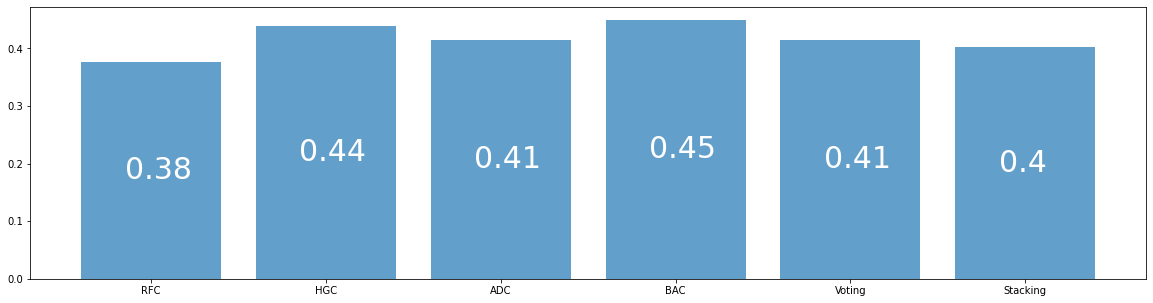

In [46]:
plt.figure(figsize=(20,5))
plt.bar(resultados["Modelo"],resultados["RMSE"],alpha=0.7)
for i,j in enumerate(resultados["RMSE"]):
    plt.text(i-0.15,j/2,np.round(j,2),ma="center",va="center",fontsize=30,c="w")
plt.xticks(np.arange(0,6,1),resultados["Modelo"])

plt.show()

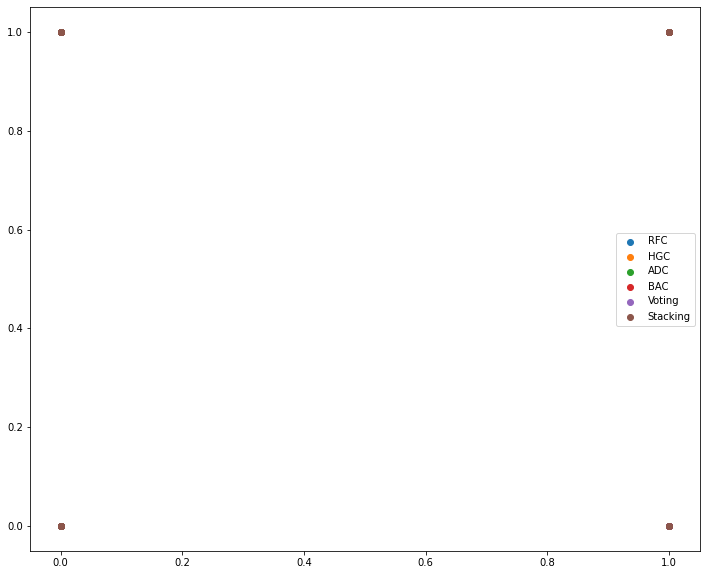

In [47]:
plt.figure(figsize=(12,10))
for i,j in zip([pred_RFC,pred_HGC,pred_ADC,pred_BAC,DEATH_EVENT_predicted_All_Voting,DEATH_EVENT_predicted_All_Stacking],["RFC","HGC","ADC","BAC","Voting","Stacking"]):
    plt.scatter(i,y_test, label=j)
    plt.legend()
plt.show()

# Problema de Regresión



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


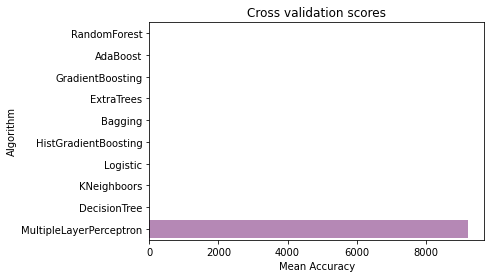

In [30]:
# Modeling step Test differents algorithms 
random_state = None
classifiers = []
classifiers.append(RandomForestRegressor(random_state=random_state))
classifiers.append(AdaBoostRegressor(random_state=random_state,learning_rate=0.1))
classifiers.append(GradientBoostingRegressor(random_state=random_state))
classifiers.append(ExtraTreesRegressor(random_state=random_state))
classifiers.append(BaggingRegressor(random_state=random_state))
classifiers.append(HistGradientBoostingRegressor(random_state=random_state))
classifiers.append(LogisticRegression(random_state=random_state))
classifiers.append(KNeighborsRegressor())
classifiers.append(DecisionTreeRegressor(random_state=random_state))
classifiers.append(MLPRegressor(random_state=random_state))

cv_results, cv_results2 = [], []
for classifier in classifiers:
    cv_results.append(cross_validate(classifier,X_train,y_train,cv=7,scoring="r2",n_jobs=-1))
    classifier.fit(X_train,y_train)
    y_pred=classifier.predict(X_test)
    cv_results2.append(np.sqrt(mean_squared_error(y_pred,y_test)))
    cv_results.append(cv_results)

cv_res = pd.DataFrame({"RMSE":cv_results2,
                       "Algorithm":["RandomForest","AdaBoost","GradientBoosting","ExtraTrees","Bagging","HistGradientBoosting",
                                    "Logistic","KNeighboors","DecisionTree","MultipleLayerPerceptron"]})
#cv_res=cv_res.sort_values(by="CrossValMeans",ascending=False)
g = sb.barplot("RMSE","Algorithm",data=cv_res,palette="Set3",orient="h")
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

In [58]:
MLPR = MLPRegressor()
MLPR.fit(X_train,y_train)
pred_MLPR=MLPR.predict(X_test)

In [61]:
print("RMSE for MLPR","is ",np.sqrt(mean_squared_error(pred_MPLR,y_test)))

RMSE for MLPR is  8305.079522233724


Los datos no se ven representados por un módelo de Regresión más si por uno de clasificación